## Homework 20190921

### 安裝 Jieba

In [1]:
! pip install jieba

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\c9\c7\63\a9ec0322ccc7c365fd51e475942a82395807186e94f0522243
Successfully built jieba


### 如果碰到 SSL Verify Error

In [ ]:
! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org jieba

### Jieba 切詞

In [3]:
import jieba

seg_list = jieba.cut("媽祖昨天託夢請我選總統")
print("/ ".join(seg_list))  

媽祖/ 昨天/ 託/ 夢/ 請/ 我/ 選總統


In [4]:
jieba.load_userdict('userdict.txt')

In [5]:
import jieba
seg_list = jieba.cut("媽祖昨天託夢請我選總統")
print("/ ".join(seg_list))  

媽祖/ 昨天/ 託夢/ 請/ 我/ 選總統


### 請用 jieba 將郭台銘演說文切詞

In [28]:
speech = '''
人生充滿著各種大大小小的決定。有些決定很容易，有些決定很困難。

我一直在思考：什麼是真正的承擔？一肩挑起是承擔？又或者，放下才是真正的承擔？

我參選總統的初衷，是希望能夠帶領台灣社會齊心拚經濟，但投身選戰以來，我看到的卻是一些政治人物為了私利，挑起階級、仇恨、對立等民粹，那麼，這些會因為我義無反顧的挑起責任而終結嗎？抑或是需要我放下才可能拉回走偏的旋律呢？

不是因為任何人的勸說與影響，而是因為我再三思考之後，希望讓社會在關注國家領導人的選擇時，能夠回歸理性思考與政策層面的討論，於是，我決定不參與2020連署競選總統。

也因此，我要向期盼我出來參選的好朋友們深深一鞠躬，表達我最誠摯的歉意：「對不起，我讓你們失望了！」我知道這個決定會讓很多支持者難以接受，雖然參與政治到現在才短短的時間，但大家的熱情我都感受到了，尤其，當我聽到一些支持者即使遭到言語霸凌也仍然堅定支持我時，更是讓我感到心疼與感謝。因此，我除了要對支持者表達最誠摯的歉意之外，也要對大家說聲「謝謝你們」，感謝大家一直以來對我的支持與愛護。

這幾個月來，我有機會能夠跟各行各業的朋友接觸、談心，讓我更清楚知道能夠為眾人服務是一件快樂又有意義的事情，因此，雖然不參與總統選舉，但並不表示我放棄參與政治事務。我會持續積極推動我所提出的政策，也期盼能夠有更多有理念的朋友願意一起為台灣繼續努力，讓台灣有著和平、安定、經濟與未來。

而這陣子以來，無論是對我的抨擊，或是對我的肯定，我也都會或反省、或珍惜的，將這些化為我人生路上更豐富的養分。

我依然是永遠的中華民國派。當中華民國需要郭台銘的時候，郭台銘永遠都在。
'''

In [9]:
a = 'this is a book'
words = a.split()
words

['this', 'is', 'a', 'book']

In [41]:
ary = []
with open('stopwords.txt', 'r', encoding = 'utf-8') as f:
    for w in f.readlines():
        ary.append(w.strip())
#ary

In [44]:
#with open('stopwords.txt', 'r', encoding = 'utf-8') as f:
#    stopwords = f.read()
#stopwords
stopwords = [w.strip() for w in open('stopwords.txt', 'r', encoding = 'utf-8')]

In [45]:
words = jieba.cut(speech)
#for w in words:
#    print(w)

#list(words)

In [46]:
dic = {}
for w in list(words):
    if len(w) >=2 and w not in stopwords:
        if w not in dic:
            dic[w] = 1
        else:
            dic[w] = dic[w] + 1

In [47]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)

In [48]:
for k,v in swd[0:10]:
    print(k,v)

決定 5
能夠 5
思考 3
承擔 3
總統 3
政治 3
朋友 3
支持者 3
人生 2
一直 2


## CKIPTagger
- https://github.com/ckiplab/ckiptagger

## Homework 20190922

回家作業

試抓取自由時報的即時新聞列表, 並將標題, 連結與時間整理出來
https://news.ltn.com.tw/list/breakingnews

In [49]:
import requests
res =  requests.get('https://news.ltn.com.tw/list/breakingnews')
res

<Response [200]>

In [52]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
#soup

### CSS Selector
- https://www.w3schools.com/cssref/css_selectors.asp

In [62]:
#try - except
for news in soup.select('ul.list li'):
    try:
        print(news.select_one('p').text)
    except:
        pass
    print('==========================================')

（贈票）久石讓操刀配樂《海獸之子》身歷其境奇幻海洋國度                                                    
NBA》美媒預測湖人將大手筆續約 A.戴維斯下季動向語帶保留                                                    
官大一定學問大？ 音樂人一席話突破盲點                                                    
籌贍養費自斷前程 消防分隊長詐2萬多公款判1年10月                                                    
是否再替韓國瑜站台？ 馬英九今親自回應                                                    
12強》不選強打捕手森友哉 西武3將有望進日本隊                                                    
Toyota 集團全新小 SUV 車名遭日媒曝光，連試駕感想都出爐！                                                    
沿著基隆河路跑 馬英九與跑者漫步黃金山城                                                            



MLB》洋基派克斯頓昨僅投一局就傷退 檢查結果出爐                                                            



MLB》光芒打線熄火吞敗 恐失外卡主場優勢                                                    
吳建恆奪廣播金鐘最大獎 曹西平爆不為人知秘辛                                                    
太麻里三和漁場有觀光潛力 公有地將整合                                                    
MLB》陳偉殷受隊友失誤拖累 遭哈波敲三分彈 （影音）                             

In [63]:
# None, False, [], {}, ()
if None:
    print('yes')

In [65]:
if []:
    print('yes')

In [64]:
if [1,2,3]:
    print('yes')

yes


In [77]:
#soup.select('ul.list.imm')
for news in soup.select('ul.list li'):
    if news.select_one('p'):
        #print(news)
        title = news.select_one('p').text.strip()
        link = 'https:' +news.select_one('a').get('href')
        dt = news.select_one('span').text
        print(title, link, dt)
        print('==========================================')

（贈票）久石讓操刀配樂《海獸之子》身歷其境奇幻海洋國度 https://ent.ltn.com.tw/news/breakingnews/2929563 10:00
NBA》美媒預測湖人將大手筆續約 A.戴維斯下季動向語帶保留 https://sports.ltn.com.tw/news/breakingnews/2930369 09:58
官大一定學問大？ 音樂人一席話突破盲點 https://ent.ltn.com.tw/news/breakingnews/2930400 09:48
籌贍養費自斷前程 消防分隊長詐2萬多公款判1年10月 https://news.ltn.com.tw/news/society/breakingnews/2930391 09:39
是否再替韓國瑜站台？ 馬英九今親自回應 https://news.ltn.com.tw/news/politics/breakingnews/2930385 09:37
12強》不選強打捕手森友哉 西武3將有望進日本隊 https://sports.ltn.com.tw/news/breakingnews/2930361 09:36
Toyota 集團全新小 SUV 車名遭日媒曝光，連試駕感想都出爐！ https:https://auto.ltn.com.tw/news/13662 09:35
沿著基隆河路跑 馬英九與跑者漫步黃金山城 https://news.ltn.com.tw/news/life/breakingnews/2930386 09:34
MLB》洋基派克斯頓昨僅投一局就傷退 檢查結果出爐 https://sports.ltn.com.tw/news/breakingnews/2930339 09:32
MLB》光芒打線熄火吞敗 恐失外卡主場優勢 https://sports.ltn.com.tw/news/breakingnews/2930341 09:31
吳建恆奪廣播金鐘最大獎 曹西平爆不為人知秘辛 https://ent.ltn.com.tw/news/breakingnews/2930379 09:22
太麻里三和漁場有觀光潛力 公有地將整合 https://news.ltn.com.tw/news/life/breakingnews/2930370 09:20
MLB》陳偉殷

## 圖片抓取

In [88]:
for news in soup.select('ul.list li'):
    if news.select_one('p'):
        link = news.select_one('img').get('src')
        #print(link)
        res2 = requests.get(link)
        fname = link.split('/')[-1]
        #print(fname)
        with open(fname, 'wb') as f:
            f.write(res2.content)
        

In [86]:
res2 = requests.get('https://img.ltn.com.tw/Upload/ent/page/800S/2019/09/28/phpZu8owC.jpg')
with open('1.jpg', 'wb') as f:
    f.write(res2.content)

## 591 租屋網

In [109]:
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('https://rent.591.com.tw/?kind=1&region=1&section=5')
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name="csrf-token"]').get('content')
print(token)

qbTXYVx6pYCKABJlBIthy2DjVgSboKSvupjZXYGX


In [110]:
headers = {
'X-CSRF-TOKEN': token,
'X-Requested-With': 'XMLHttpRequest'    
}
res2 = rs.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=843', headers = headers)

In [112]:
#res2.json()

## 農民曆爬取

In [96]:
import requests
res = requests.get('https://fate.windada.com/cgi-bin/calendar')

In [106]:
res.encoding = 'utf-8'

import re
m = re.search('DayInfoA\[29\]=(.*)', res.text)
soup = BeautifulSoup(m.group(1).strip(), 'lxml')
for ele in soup.select('p'):
    print(ele.text)

'
【陽曆】2019年09月29日　　【沖豬37,97歲煞東】
【農曆】2019年09月01日　　【劫煞︰鼠龍猴】
【干支】己亥年癸酉月己巳日 【胎神】占門床,外正南
【九宮】八白年四綠月七赤日 【吉時】丑辰午未戌亥
【方位】喜神東北　財神正北　福神正南 【週堂】婦
【彭祖百忌】己不破券,二主並亡. 巳不遠行,財物伏藏。
【12建星】成白虎  【28星宿】 房日兔  【金符】煞貢
【吉神】三合 月財 普護 天喜 歲德合 十全
【凶神】神號 刀砧 五鬼 歲破 橫天朱雀 臨日 伏斷 伏罪 土禁
【宜】修造 動土 移徙 開市 破土 交易 開倉 立券 栽種 納畜 入學 納采 入宅 造倉 起灶 祈福 求醫 祭祀
【忌】訴訟 伐木 針灸 起造 架馬 裁衣 納財 經絡
 【成巳】查看董公詳批 


## Numpy

In [113]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]


In [114]:
a * b

TypeError: can't multiply sequence by non-int of type 'list'

In [115]:
len(a)

5

In [117]:
for i in range(len(a)):
    #print(i)
    print(a[i] * b[i])

2
12
30
56
90


In [118]:
ary = []
for i in range(len(a)):
    ary.append(a[i] * b[i])

In [119]:
[a[i] * b[i] for i in range(len(a))]

[2, 12, 30, 56, 90]

In [120]:
for rec in zip(a,b):
    print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [121]:
for rec in zip(a,b):
    print(rec[0] * rec[1])

2
12
30
56
90


In [122]:
import numpy as np
na = np.array(a)

In [123]:
a

[1, 3, 5, 7, 9]

In [124]:
type(a)

list

In [128]:
a.append('s')

In [129]:
a

[1, 3, 5, 7, 9, 's']

In [125]:
na

array([1, 3, 5, 7, 9])

In [127]:
type(na)

numpy.ndarray

In [130]:
na.append('s')

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [131]:
import numpy as np
na = np.array([1, 3, 5, 7, 9, 's'])

In [132]:
na

array(['1', '3', '5', '7', '9', 's'], dtype='<U11')

In [133]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]


In [134]:
na = np.array(a)
nb = np.array(b)

In [135]:
na * nb

array([ 2, 12, 30, 56, 90])

In [137]:
import numpy as np
my_list = [1,2,3]
na = np.array(my_list)

In [138]:
type(na)

numpy.ndarray

In [139]:
print(dir(na))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [140]:
na.shape

(3,)

In [141]:
my_matrix = [[1,2,3],[4,5,6],[7,8,9]]
nm = np.array(my_matrix)

In [142]:
nm

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [143]:
nm.shape

(3, 3)

In [145]:
#產生數列
np.arange(0,10)
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [149]:
#產生0與1
np.zeros(3)
np.zeros((5,5))
np.ones(3)
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [152]:
#根據給定範圍產生數列
np.linspace(0,10,3)
#np.linspace(0,10,50)

array([ 0.,  5., 10.])

In [153]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [160]:
#產生隨機數列
np.random.rand(2)
np.random.rand(5,5)
np.random.randn(2)
np.random.randn(5,5)
np.random.randint(1,100)
np.random.randint(1,100,10)
np.random.randint(1,42,6)

array([40, 15,  6, 25, 21, 32])

In [161]:
arr = np.arange(25)

In [162]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [163]:
arr.shape

(25,)

In [165]:
a = arr.reshape((1,25))

In [166]:
a.shape

(1, 25)

In [169]:
a = arr.reshape((25,1))
a.shape

(25, 1)

In [170]:
arr.reshape((5,5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [173]:
arr = np.array([3,5,1,2,7,6,2,3,9])

In [174]:
arr.min()

1

In [178]:
arr.argmin()

2

In [175]:
arr.max()

9

In [177]:
arr.argmax()

8

In [176]:
arr.sum()

38

In [179]:
arr.dtype

dtype('int32')

In [181]:
arr = np.arange(0,11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [182]:
arr[8]


8

In [183]:
arr[1:5]

array([1, 2, 3, 4])

In [184]:
arr = np.arange(0,11)
slice_of_arr = arr[0:6]


In [185]:
slice_of_arr

array([0, 1, 2, 3, 4, 5])

In [186]:
slice_of_arr[:]=99

In [187]:
slice_of_arr

array([99, 99, 99, 99, 99, 99])

In [188]:
arr

array([99, 99, 99, 99, 99, 99,  6,  7,  8,  9, 10])

In [193]:
arr_2d = np.array(([5,10,15],[20,25,30],[35,40,45]))
arr_2d[1]
arr_2d[1][0]
arr_2d[1,0]
arr_2d[2]
arr_2d[2,:]

array([35, 40, 45])

In [195]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [196]:
arr > 4


array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [197]:
bool_arr = arr>4
bool_arr

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [198]:
arr[bool_arr]

array([ 5,  6,  7,  8,  9, 10])

In [199]:
arr = np.arange(0,10)
arr


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [200]:
arr + arr


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [201]:
arr * arr


array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [202]:
arr - arr


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [203]:
arr/arr # 0/0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [204]:
1/arr # 1/ 0 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [205]:
arr ** 3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [210]:
np.sqrt(arr)
np.exp(arr)
np.max(arr)
np.sin(arr)
np.log(arr)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [214]:
input_ary = np.array([1,2,3,4])
w1 = np.random.randn(4,5)
np.dot(input_ary, w1)

array([ 4.8015598 ,  9.97784948,  5.80093252,  1.75971703, -9.38449076])

In [215]:
w2 = np.random.randn(5,3)

In [216]:
np.dot(np.dot(input_ary, w1), w2)

array([-11.73293221,  14.04109372,   8.88369461])

## Pandas
- https://www.books.com.tw/products/0010800271?gclid=EAIaIQobChMInIfLrpL15AIVlK2WCh3eLwxTEAYYASABEgL2M_D_BwE

In [217]:
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na


array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U5')

In [220]:
# array[列,欄]
na[:,2].astype(int).sum()

161

In [221]:
import numpy as np
na = np.array([['name', 'gender', 'age'], ['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na


array([['name', 'gender', 'age'],
       ['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U6')

In [222]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [224]:
df.loc[0,0]

'frank'

In [225]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [226]:
df.columns=['name', 'gender', 'age']

In [227]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [229]:
df['name'][0]

'frank'

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name      6 non-null object
gender    6 non-null object
age       6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [231]:
df['age'].sum()

161

In [232]:
df['age'].mean()

26.833333333333332

## Pandas Series

In [233]:
import numpy as np
import pandas as pd

In [234]:
labels = ['a','b','c']
my_list = [10,20,30]

In [237]:
a = pd.Series(data=my_list)
a

0    10
1    20
2    30
dtype: int64

In [238]:
a[0]

10

In [239]:
a = pd.Series(data=my_list,index=labels)
a

a    10
b    20
c    30
dtype: int64

In [240]:
a[0]

10

In [241]:
a['a']

10

In [242]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

In [244]:
arr = np.array([10,20,30])
pd.Series(arr)
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

In [245]:
d = {'a':10,'b':20,'c':30}
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [247]:
ser1 = pd.Series([1,2,3,4],index = ['USA',
'Germany','USSR', 'Japan'])
ser2 = pd.Series([1,2,5,4],index = ['USA',
'Germany','Italy', 'Japan'])

In [248]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [249]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [250]:
ser1['USA']

1

In [251]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

In [252]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [253]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted',
'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]], columns = ['name', 'gender', 'age'])

In [255]:
print(df)

    name gender  age
0  frank      M   29
1   mary      F   23
2    tom      M   35
3    ted      M   33
4   jean      F   21
5   lisa      F   20


In [256]:
df = pd.DataFrame([
    {'name':'frank','gender':'M', 'age':29}, 
{'name':'mary','gender':'F', 'age':23}, 
{'name':'tom','gender':'M', 'age':35}, 
{'name':'ted','gender':'M', 'age':33}, 
{'name':'jean','gender':'F', 'age':21}, 
    {'name':'lisa','gender':'F', 'age':20}])

In [258]:
#df

In [259]:
pd.DataFrame([['a',1,2],['b',2,3], ['c',3]])

,0,1,2
0,a,1,2.0
1,b,2,3.0
2,c,3,NaN


In [260]:
pd.DataFrame([
    {'k':'a', 'c1':1, 'c2':2},
    {'k':'b','c1':2,'c2':3}, 
    {'k':'c','c2':3}])

,c1,c2,k
0,1.0,2,a
1,2.0,3,b
2,NaN,3,c


In [261]:
df = pd.DataFrame([
    {'name':'frank','gender':'M', 'age':29}, 
{'name':'mary','gender':'F', 'age':23}, 
{'name':'tom','gender':'M', 'age':35}, 
{'name':'ted','gender':'M', 'age':33}, 
{'name':'jean','gender':'F', 'age':21}, 
    {'name':'lisa','gender':'F', 'age':20}])

In [264]:
?df.head

In [265]:
df.head(3)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom


In [266]:
df.tail(3)

,age,gender,name
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
age       6 non-null int64
gender    6 non-null object
name      6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [268]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [269]:
df.dtypes

age        int64
gender    object
name      object
dtype: object

In [271]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [272]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [273]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [274]:
df[df['gender'] == 'M']

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [275]:
(df['gender'] == 'M') & (df['age'] >= 30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [276]:
df[(df['gender'] == 'M') & (df['age'] >= 30)]

,age,gender,name
2,35,M,tom
3,33,M,ted


In [277]:
df[(df['gender'] == 'M') | (df['age'] >= 30)]

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [278]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [279]:
df['employee'] = True

In [280]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [281]:
del df['employee']

In [282]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [289]:
df['employee'] = True

In [299]:
?df.drop

In [290]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [297]:
df.drop(labels = 'employee', axis= 1)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [300]:
df.drop(labels = 'employee', axis= 1, inplace=True)

In [302]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [303]:
df.loc[6] = {'age':20,'gender':'F','name':'qoo'}

In [304]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo


In [307]:
df.drop(labels = 6, axis = 0 , inplace=True )

In [308]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [311]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),ignore_index=True)


In [312]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo


In [313]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [315]:
df['userid'] = range(101,108)

In [316]:
df

,age,gender,name,userid
0,29,M,frank,101
1,23,F,mary,102
2,35,M,tom,103
3,33,M,ted,104
4,21,F,jean,105
5,20,F,lisa,106
6,20,F,qoo,107


In [319]:
df.set_index('userid', inplace=True)

In [320]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa
107,20,F,qoo


In [321]:
# iloc 根據位置
df.iloc[0]

age          29
gender        M
name      frank
Name: 101, dtype: object

In [322]:
df.iloc[[0,2,4]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


In [324]:
# loc 根據索引
#df.loc[0]

In [325]:
df.loc[101]

age          29
gender        M
name      frank
Name: 101, dtype: object

In [326]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


## 偵測缺失值

In [327]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
['frank', 'M', np.nan], 
['mary', np.nan, np.nan], 
['tom' , 'M', 35], 
['ted' , 'M', 33], 
['jean' , np.nan, 21], 
['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df


,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [328]:
df['gender']

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [329]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [330]:
df['gender'].notna()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [331]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [332]:
df['gender'].isna()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [333]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [334]:
df.name

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [340]:
df['name'].isnull().values

array([False, False, False, False, False, False])

In [342]:
df['name'].isnull().values.any()

False

In [344]:
df['name'].notnull().values.all()

True

In [347]:
# True:1, False: 0 
df['gender'].isnull().sum()

2

In [348]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [349]:
df.isnull().sum().sum()

4

In [351]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [352]:
df.dropna(how= 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [353]:
# df.dropna(thresh=2,inplace=True)
df.dropna(thresh=2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [354]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [355]:
df['employee'] = np.nan

In [358]:
df.dropna(how= 'all',axis = 1)

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [360]:
df['age'].fillna(0)

0     0.0
1     0.0
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [361]:
df.fillna(0)

,name,gender,age,employee
0,frank,M,0.0,0.0
1,mary,0,0.0,0.0
2,tom,M,35.0,0.0
3,ted,M,33.0,0.0
4,jean,0,21.0,0.0
5,lisa,F,20.0,0.0


In [362]:
df['age'].mean()

27.25

In [363]:
df['age'].fillna(df['age'].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [364]:
# select gender, AVG(age) from df group by gender
df.groupby('gender')['age'].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [365]:
df['age']

0     NaN
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [367]:
df.groupby('gender')['age'].transform('mean')

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [368]:
df['age'].fillna(df.groupby('gender')['age'].transform('mean'))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [369]:
df

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [370]:
df.fillna(method='pad')

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,M,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,M,21.0,NaN
5,lisa,F,20.0,NaN


In [371]:
df.fillna(method='bfill', limit=2)

,name,gender,age,employee
0,frank,M,35.0,NaN
1,mary,M,35.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,F,21.0,NaN
5,lisa,F,20.0,NaN


In [372]:
df2 = pd.DataFrame([[1, 870],
                    [2, 900],
                    [np.nan, np.nan],
                    [4, 950],
                    [5,1080],
                    [6,1200]])
df2.columns = ['time','val']
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 資料轉換

In [375]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)
#df

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
detail_url       70315 non-null object
search_date      70315 non-null object
title            70315 non-null object
address          70315 non-null object
floor_info       69686 non-null object
price            70315 non-null object
layout           22630 non-null object
building_area    70315 non-null float64
building_use     65330 non-null object
latitude         70315 non-null float64
longitude        70315 non-null float64
dtypes: float64(3), object(8)
memory usage: 6.4+ MB


In [377]:
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [379]:
(df['building_area'] / 0.3025).head()

0    19.834711
1    33.057851
2    26.446281
3    26.446281
4    23.140496
Name: building_area, dtype: float64

In [381]:
import numpy as np
np.sqrt(df['building_area']).head()

0    2.449490
1    3.162278
2    2.828427
3    2.828427
4    2.645751
Name: building_area, dtype: float64

In [383]:
(df['address'] + '-' + df['price']).head()

0       高雄市湖內區民生街-4,500元/月
1       新北市蘆洲區長安街-7,500元/月
2    新北市永和區中山路一段-11,000元/月
3       屏東縣潮州鎮六合路-5,000元/月
4       桃園市觀音區四維路-5,000元/月
dtype: object

In [384]:
df['square_feet'] = df['building_area'] / 0.3025

In [385]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,square_feet
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,19.834711
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,33.057851
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,26.446281
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032,26.446281
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518,23.140496


In [388]:
s = '4,500元/月'
int(s.replace('元/月', '').replace(',', ''))

4500

In [389]:
def normalizePrice(ele):
    return int(ele.replace('元/月', '').replace(',', ''))

In [394]:
# lambda function
normalizePrice2 = lambda ele: int(ele.replace('元/月', '').replace(',', ''))
normalizePrice2(s)

4500

In [390]:
normalizePrice(s)

4500

In [393]:
df['price'].map(normalizePrice).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [395]:
df['price'].map(lambda ele: int(ele.replace('元/月', '').replace(',', ''))).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [396]:
df['price'] = df['price'].map(lambda ele: int(ele.replace('元/月', '').replace(',', '')))

In [400]:
(df['price'] / df['building_area']).mean()

1105.7442117715323

In [401]:
df = pd.DataFrame([
[60,70,50],
[80,79,68],
[63,66,82]], 
columns = ['First', 'Second', 'Third'])

In [403]:
df

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [405]:
df.apply(lambda e: e.max()-e.min(), axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [406]:
df.apply(lambda e: e.max()-e.min(), axis = 1)

0    20
1    12
2    19
dtype: int64

In [407]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame([
['frank', 'M', np.nan], 
['mary', np.nan, np.nan], 
['tom' , 'M', 35], 
['ted' , 'M', 33], 
['jean' , np.nan, 21], 
['lisa', 'F', 20]])
df2.columns = ['name', 'gender', 'age']
df2


,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [409]:
df2.applymap(lambda e: '-' if pd.isnull(e) else e)

,name,gender,age
0,frank,M,-
1,mary,-,-
2,tom,M,35
3,ted,M,33
4,jean,-,21
5,lisa,F,20


## 時間格式的資料

In [410]:
from datetime import datetime
current_time = datetime.now()

In [411]:
current_time

datetime.datetime(2019, 9, 29, 14, 27, 56, 995808)

In [412]:
current_time.strftime('%Y-%m-%d')

'2019-09-29'

In [413]:
datetime.strptime('2019-04-21', '%Y-%m-%d')

datetime.datetime(2019, 4, 21, 0, 0)

In [415]:
from datetime import datetime, timedelta
current_time - timedelta(days = 1)

datetime.datetime(2019, 9, 28, 14, 27, 56, 995808)

In [419]:
(current_time - timedelta(days = 1)).strftime('%Y/%m/%d')

'2019/09/28'

In [421]:
for i in range(10):
    dt = (current_time + timedelta(days = i)).strftime('%Y/%m/%d')
    print(dt)

2019/09/29
2019/09/30
2019/10/01
2019/10/02
2019/10/03
2019/10/04
2019/10/05
2019/10/06
2019/10/07
2019/10/08


In [422]:
from time import mktime
mktime(current_time.timetuple())

1569738476.0

In [423]:
datetime.fromtimestamp(1555860118)

datetime.datetime(2019, 4, 21, 23, 21, 58)

In [424]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)
#df

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
detail_url       70315 non-null object
search_date      70315 non-null object
title            70315 non-null object
address          70315 non-null object
floor_info       69686 non-null object
price            70315 non-null object
layout           22630 non-null object
building_area    70315 non-null float64
building_use     65330 non-null object
latitude         70315 non-null float64
longitude        70315 non-null float64
dtypes: float64(3), object(8)
memory usage: 6.4+ MB


In [428]:
df['search_date'] = pd.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [432]:
df[df['search_date'] >= '2017-05-14'].head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
6,https://rent.591.com.tw/rent-detail-1299940.html,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,"6,500元/月",NaN,7.0,電梯大樓/雅房,24.871279,120.986334


In [433]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame([
['frank', 'M', np.nan], 
['mary', 'F', np.nan], 
['tom' , 'M', 35], 
['ted' , 'M', 33], 
['jean' , 'F', 21], 
['lisa', 'F', 20]])
df2.columns = ['name', 'gender', 'age']
df2


,name,gender,age
0,frank,M,NaN
1,mary,F,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [435]:
df2.groupby('gender')['age'].mean()

gender
F    20.5
M    34.0
Name: age, dtype: float64

In [437]:
df2

,name,gender,age
0,frank,M,NaN
1,mary,F,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [436]:
df2.groupby('gender')['age'].transform('mean')

0    34.0
1    20.5
2    34.0
3    34.0
4    20.5
5    20.5
Name: age, dtype: float64

In [438]:
missingage = df2.groupby('gender')['age'].transform('mean')
df2['age'].fillna(missingage)

0    34.0
1    20.5
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

## 虛擬變量

In [442]:
df2 = df[df['building_use'].notnull()]

In [443]:
df2['btype'] = df2['building_use'].map(lambda e: e.split('/')[0])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [445]:
df2['buse'] = df2['building_use'].map(lambda e: e.split('/')[1])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [447]:
df2['btype'].unique()

array(['透天厝', '電梯大樓', '公寓', '別墅', '倉庫', '廠房', '廠辦', '其他'], dtype=object)

In [450]:
df2['btype'].head()

0     透天厝
1     透天厝
2    電梯大樓
3     透天厝
4     透天厝
Name: btype, dtype: object

In [449]:
# dummy variable, one hot
pd.get_dummies(df2['btype']).head()

,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [451]:
btype = pd.get_dummies(df2['btype'])

In [454]:
df2 = pd.concat([df2,btype],axis = 1)

In [457]:
# del df2['building_use']
#df2.drop('building_use', axis  = 1)

In [458]:
df2['price'] = df2['price'].map(lambda e: int(e.replace('元/月', '').replace(',','')))

In [461]:
df3 = df2.pivot_table(index='btype'
, columns='buse', values='price', aggfunc='mean')

In [462]:
df3.T

btype,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
buse,,,,,,,,
住辦,NaN,28105.258373,NaN,58756.250000,NaN,NaN,35596.451327,42305.047541
其他,25248.425926,18219.322581,5700.0,59923.255814,76662.857143,100681.818182,32087.895161,83718.077720
分租套房,NaN,7922.076370,NaN,6054.381944,NaN,NaN,5789.218665,8188.891266
店面,NaN,66280.344463,NaN,45681.094340,NaN,NaN,68289.010172,120732.349245
整層住家,NaN,19341.883862,NaN,51910.286041,NaN,NaN,21446.173997,34291.788615
獨立套房,NaN,8299.202955,NaN,6426.847397,NaN,NaN,6358.861914,11885.772360
辦公,NaN,43593.812287,NaN,47200.000000,NaN,NaN,33433.500000,130070.541150
雅房,NaN,5604.915842,NaN,4788.000000,NaN,NaN,4089.829474,5699.728448


In [463]:
df2.pivot_table(index='buse'
, columns='btype', values='price', aggfunc='mean')

btype,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
buse,,,,,,,,
住辦,NaN,28105.258373,NaN,58756.250000,NaN,NaN,35596.451327,42305.047541
其他,25248.425926,18219.322581,5700.0,59923.255814,76662.857143,100681.818182,32087.895161,83718.077720
分租套房,NaN,7922.076370,NaN,6054.381944,NaN,NaN,5789.218665,8188.891266
店面,NaN,66280.344463,NaN,45681.094340,NaN,NaN,68289.010172,120732.349245
整層住家,NaN,19341.883862,NaN,51910.286041,NaN,NaN,21446.173997,34291.788615
獨立套房,NaN,8299.202955,NaN,6426.847397,NaN,NaN,6358.861914,11885.772360
辦公,NaN,43593.812287,NaN,47200.000000,NaN,NaN,33433.500000,130070.541150
雅房,NaN,5604.915842,NaN,4788.000000,NaN,NaN,4089.829474,5699.728448


## Pandas Aggregation

In [465]:
# SELECT building_use, AVG(price) FROM df GROUP BY building_use;
df2.groupby('building_use')['price'].mean()

building_use
倉庫/其他         25248.425926
公寓/住辦         28105.258373
公寓/其他         18219.322581
公寓/分租套房        7922.076370
公寓/店面         66280.344463
公寓/整層住家       19341.883862
公寓/獨立套房        8299.202955
公寓/辦公         43593.812287
公寓/雅房          5604.915842
其他/其他          5700.000000
別墅/住辦         58756.250000
別墅/其他         59923.255814
別墅/分租套房        6054.381944
別墅/店面         45681.094340
別墅/整層住家       51910.286041
別墅/獨立套房        6426.847397
別墅/辦公         47200.000000
別墅/雅房          4788.000000
廠房/其他         76662.857143
廠辦/其他        100681.818182
透天厝/住辦        35596.451327
透天厝/其他        32087.895161
透天厝/分租套房       5789.218665
透天厝/店面        68289.010172
透天厝/整層住家      21446.173997
透天厝/獨立套房       6358.861914
透天厝/辦公        33433.500000
透天厝/雅房         4089.829474
電梯大樓/住辦       42305.047541
電梯大樓/其他       83718.077720
電梯大樓/分租套房      8188.891266
電梯大樓/店面      120732.349245
電梯大樓/整層住家     34291.788615
電梯大樓/獨立套房     11885.772360
電梯大樓/辦公      130070.541150
電梯大樓/雅房        5699.728448
Name: price, dt

In [472]:
# SELECT building_use, AVG(price) FROM df GROUP BY building_use ORDER BY AVG(price) DESC LIMIT 3;
df2.groupby('building_use')['price'].mean().sort_values(ascending=False).head(3)

building_use
電梯大樓/辦公    130070.541150
電梯大樓/店面    120732.349245
廠辦/其他      100681.818182
Name: price, dtype: float64

In [475]:
#SELECT search_date, building_use, AVG(price) FROM df GROUP BY search_date, building_use ORDER BY AVG(price) DESC LIMIT 3;
df2.groupby(['search_date','building_use'])['price'].mean().sort_values(ascending=False).head(3)

search_date  building_use
2017-05-12   廠辦/其他           270666.666667
2017-05-11   別墅/住辦           234000.000000
             廠房/其他           195250.000000
Name: price, dtype: float64

In [477]:
df2.groupby('building_use')['price'].sum().head(3)

building_use
倉庫/其他    1363415
公寓/住辦    5873999
公寓/其他     564799
Name: price, dtype: int64

In [478]:
df2.groupby('building_use')['price'].mean().head(3)

building_use
倉庫/其他    25248.425926
公寓/住辦    28105.258373
公寓/其他    18219.322581
Name: price, dtype: float64

In [479]:
df2.groupby('building_use')['price'].std().head(3)

building_use
倉庫/其他    39005.084544
公寓/住辦    17006.354076
公寓/其他    11549.370584
Name: price, dtype: float64

## 資料合併

In [480]:
df1= pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[
0,1,2,3])

df2= pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4,5,6,7])

df3= pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B':['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8,9, 10, 11])

In [481]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [482]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [483]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [484]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [485]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [486]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [487]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [488]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [489]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [498]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})


In [499]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [500]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [493]:
pd.merge(left, right, how='inner', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [494]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])


In [495]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [496]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [497]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [501]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

In [502]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [504]:
lookuptable = pd.DataFrame({
'K': ['A0', 'A1', 'A2', 'A3'],
'V': ['B0', 'B1', 'B2', 'B3']})
lookuptable

,K,V
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [505]:
pd.merge(left, lookuptable, left_on='A', right_on='K')

,key1,key2,A,B,K,V
0,K0,K0,A0,B0,A0,B0
1,K0,K1,A1,B1,A1,B1
2,K1,K0,A2,B2,A2,B2
3,K2,K1,A3,B3,A3,B3


## 正規表達法

In [506]:
a = '0912345678'
'0912345678' == a

True

In [507]:
a = '0922333555'
'0912345678' == a

False

In [513]:
s = 'w'

In [514]:
import re
print(re.match('w', s))

<re.Match object; span=(0, 1), match='w'>


In [515]:
s = 'z'
print(re.match('w', s))

None


In [516]:
# [] => matching any character within []
print(re.match('[abcdefghijklmnopqrstuvwxyz]', s))

<re.Match object; span=(0, 1), match='z'>


In [517]:
# - => continuous
# [abcdefghijklmnopqrstuvwxyz] => [a-z]
print(re.match('[a-z]', s))

<re.Match object; span=(0, 1), match='z'>


In [519]:
s = 'X'
print(re.match('[a-z]', s))

None


In [520]:
print(re.match('[a-zA-Z]', s))

<re.Match object; span=(0, 1), match='X'>


In [522]:
s = '5'
print(re.match('[0-9]', s))

<re.Match object; span=(0, 1), match='5'>


In [523]:
# \d => [0-9]
print(re.match('\d', s))

<re.Match object; span=(0, 1), match='5'>


In [524]:
print(re.match('[a-zA-Z0-9]', s))

<re.Match object; span=(0, 1), match='5'>


In [525]:
# \w => [a-zA-Z0-9]
print(re.match('\w', s))

<re.Match object; span=(0, 1), match='5'>


In [528]:
s = '$'
print(re.match('\w', s))

None


In [529]:
print(re.match('[\w!@#$%^&*]', s))

<re.Match object; span=(0, 1), match='$'>


In [530]:
# . => match any character
print(re.match('.', s))

<re.Match object; span=(0, 1), match='$'>


In [531]:
s = 'apple'
print(re.match('\w', s))

<re.Match object; span=(0, 1), match='a'>


In [532]:
# {n}: match exact n characters
print(re.match('\w{5}', s))

<re.Match object; span=(0, 5), match='apple'>


In [533]:
# {m,n}: match at least m characters, at most n charaters
s = 'appledaily'
print(re.match('\w{5,20}', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [534]:
# {m,}: match at least m characters
print(re.match('\w{5,}', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [535]:
# {,n}: match at most n characters
print(re.match('\w{,10}', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [536]:
# {0,}: match at least 0 characters
print(re.match('\w{0,}', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [537]:
# * => {0,}
print(re.match('\w*', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [538]:
# {1,}: match at least 1 characters
print(re.match('\w{1,}', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [539]:
# + => {1,}
print(re.match('\w+', s))

<re.Match object; span=(0, 10), match='appledaily'>


In [543]:
phones = ['0912345678', '0912-345-678', '0912-345678', '09123234230483048230823082304']
for p in phones:
    #print(re.match('09\d{8}',p))
    #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}',p))
    
    # {0,1} => ?
    #print(re.match('09\d{2}-?\d{3}-?\d{3}',p))
    
    # ^ : match the begin, $ : match the end
    print(re.match('^09\d{2}-?\d{3}-?\d{3}$',p))

<re.Match object; span=(0, 10), match='0912345678'>
<re.Match object; span=(0, 12), match='0912-345-678'>
<re.Match object; span=(0, 11), match='0912-345678'>
None


In [546]:
a = 'sentence1,sentence2,sentence3'
re.match('.+,', a)

<re.Match object; span=(0, 20), match='sentence1,sentence2,'>

In [547]:
# non-greedy matching
re.match('.+?,', a)

<re.Match object; span=(0, 10), match='sentence1,'>

In [549]:
a = '\n123\n'
print(a)


123



In [550]:
a = r'\n123\n'
print(a)

\n123\n


In [551]:
import re
m = re.match(r"(\w+)@(\w+)", "david@largidata.com")
print(m.groups())
print(m.group(1))
print(m.group(2))

('david', 'largidata')
david
largidata


In [552]:
import re
m = re.match(r"(\w+)@([\w.]+)", "david@largidata.com")
print(m.groups())
print(m.group(1))
print(m.group(2))

('david', 'largidata.com')
david
largidata.com


In [554]:
# . : match ana characters,  \. match period only
m = re.match(r"(\d+)\.(\d+)", "1999.5")
print(m.groups())

('1999', '5')


In [555]:
m = re.match(r"(\w+) (\w+)", "David Chiu")
print(m.group(1), m.group(2))

David Chiu


In [556]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "David Chiu")
print(m.group('first_name'), m.group('last_name'))

David Chiu


In [558]:
str1 ='scp file.txt root@10.0.0.1:./'

m=re.search('^scp ([\w\.]+) (\w+)@([\d\.]+):(.+)',str1)
if m:
    print(m.group(1), m.group(2), m.group(3), m.group(4))


file.txt root 10.0.0.1 ./


In [559]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)
#df

In [563]:
df[['bedroom', 'living_room', 'bathroom', 'balcony']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

In [565]:
#df.head(10)

In [569]:
df[['floor', 'total_floor']] = df['floor_info'].str.extract('(\d+)F/(\d+)F')

In [571]:
#df.head()

In [585]:
df['address'][70297:70299]

70297    台北市內湖區環山路二段
70298      台南市佳里區塭仔內
Name: address, dtype: object

In [586]:
df['address'].str.extract('(.+[市縣])(.+[區鎮鄉市])(.+[街路村])').head()

,0,1,2
0,高雄市,湖內區,民生街
1,新北市,蘆洲區,長安街
2,新北市,永和區,中山路
3,屏東縣,潮州鎮,六合路
4,桃園市,觀音區,四維路


In [587]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('C:/Users/User/Desktop/201703071813371.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        #print(lt_obj)
        if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
            s = s + lt_obj.get_text()
    break

In [595]:
names_str = '陳、林、黃、張、李、王、吳、劉、蔡、楊、許、鄭、謝、郭、洪、 邱、曾、廖、賴、徐、周、葉、蘇、莊、江、呂、何、羅、高、蕭、潘、朱、簡、鍾、彭、游、詹、胡、施、沉、余、趙、盧、梁、顏、柯、孫、魏、翁、戴、范、 宋、方、鄧、杜、傅、侯、曹、溫、薛、丁、馬、蔣、唐、卓、藍、馮、姚、石、董、紀、歐、程、連、古、汪、湯、姜、田、康、鄒、白、塗、尤、巫、韓、龔、 嚴、袁、鍾、黎、金、阮、陸、倪、夏、童、邵、柳、錢'
''.join([n.strip() for n in names_str.split('、')])

'陳林黃張李王吳劉蔡楊許鄭謝郭洪邱曾廖賴徐周葉蘇莊江呂何羅高蕭潘朱簡鍾彭游詹胡施沉余趙盧梁顏柯孫魏翁戴范宋方鄧杜傅侯曹溫薛丁馬蔣唐卓藍馮姚石董紀歐程連古汪湯姜田康鄒白塗尤巫韓龔嚴袁鍾黎金阮陸倪夏童邵柳錢'

In [602]:
342 / 6

57.0

In [607]:
import numpy as np
a = np.array(s.split('\n')[5:-1]).reshape(57,6)
#pd.DataFrame(a)

In [608]:
email = '\w+@[\w\.]+'
phone = '09\d{2}-?\d{3}-?\d{3}'
names = '[陳林黃張李王吳劉蔡楊許鄭謝郭洪邱曾廖賴徐周葉蘇莊江呂何羅高蕭潘朱簡鍾彭游詹胡施沉余趙盧梁顏柯孫魏翁戴范宋方鄧杜傅侯曹溫薛丁馬蔣唐卓藍馮姚石董紀歐程連古汪湯姜田康鄒白塗尤巫韓龔嚴袁鍾黎金阮陸倪夏童邵柳錢][\u4e00-\u9fa5]{2,3}'


#re.findall(email, s)
#re.findall(phone, s)
#re.findall(names, s)

## 農民曆

In [610]:
import requests
res = requests.get('https://fate.windada.com/cgi-bin/calendar')
res.encoding
#res.text

'ISO-8859-1'

In [611]:
res.encoding = 'utf-8'

In [615]:
import re
from bs4 import BeautifulSoup
alldatainfo = re.findall('DayInfoA\[\d+\]=(.+);', res.text)
ary = []
for datainfo in alldatainfo:
    soup = BeautifulSoup(datainfo, 'lxml')
    s = '\n'.join([p.text for p in soup.select('p')])
    ary.append(s)

In [624]:
for rec in ary:
    m = re.search('【宜】.* 動土', rec)
    #if m:
    #    print(rec)

In [632]:
train = pd.DataFrame(['A', 'B','C','D', 'E'])

In [634]:
pd.get_dummies(train[0])

,A,B,C,D,E
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [642]:
train[0].values

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [644]:
from sklearn.preprocessing import OneHotEncoder
sc = OneHotEncoder()
X = sc.fit_transform(train[0].values.reshape(-1,1))

In [645]:
X.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [646]:
test = pd.DataFrame(['A', 'B'])

In [647]:
Y = sc.transform(test[0].values.reshape(-1,1))

In [648]:
Y.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Pandas IO

In [649]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/2330.TW.csv')

In [651]:
df.to_csv('tw2330.csv')

In [652]:
df.to_csv('tw2330.tsv', sep = '\t')

In [653]:
df.to_excel('tw2330.xlsx')

In [655]:
df2 = pd.read_clipboard()

In [656]:
df2.to_clipboard()

In [657]:
df2.to_hdf('tw2330.h5', key = 'data')

In [658]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)
#df

In [662]:
df['detail_url'] = 'https://rent.591.com.tw'

In [666]:
df.to_csv('591.csv')

In [665]:
#df.to_excel('591.xlsx')

In [668]:
df.to_hdf('591.h5', key = 'data')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['detail_url', 'search_date', 'title', 'address', 'floor_info', 'price', 'layout', 'building_use']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [669]:
?df.to_hdf

In [670]:
df.to_hdf('591_2.h5', key = 'data',complevel = 7)
 

In [674]:
df.to_hdf('591_2.h5', key = 'data', mode = 'w', complevel = 9)

In [675]:
df2.to_json()

'{"Date":{"0":"2000-01-04","1":"2000-01-05","2":"2000-01-06","3":"2000-01-07","4":"2000-01-10","5":"2000-01-11","6":"2000-01-12","7":"2000-01-13"},"Open":{"0":69.649002,"1":69.649002,"2":70.822899,"3":67.3013,"4":69.649002,"5":70.822899,"6":69.2575,"7":70.822899},"High":{"0":69.649002,"1":71.214104,"2":71.214104,"3":68.475197,"4":70.431396,"5":71.605202,"6":70.822899,"7":70.822899},"Low":{"0":68.475197,"1":68.866302,"2":69.649002,"3":66.5186,"4":68.475197,"5":68.475197,"6":68.866302,"7":69.649002},"Close":{"0":69.649002,"1":71.214104,"2":69.649002,"3":67.692497,"4":70.040199,"5":68.866302,"6":70.822899,"7":69.649002}}'

In [677]:
with open('test.html' , 'w') as f:
    f.write(df2.to_html())

In [681]:
import requests
headers = {
   'user-agent': 'qoo' 
}
res = requests.get('https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330', headers = headers)
res.encoding = 'utf-8'
#res.text

In [699]:
import pandas
dfs = pandas.read_html(res.text)
df = dfs[15]

In [701]:
len(df.columns)

21

In [702]:
df.columns = range(21)

In [706]:
df.set_index(0, inplace=True)

In [721]:
df.sort_index(ascending=True, inplace=True)

In [726]:
df = df[df.index != '19Q2']

In [727]:
df2 = df[df[3] != '-']

In [728]:
df2[3] = df2[3].astype(float)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


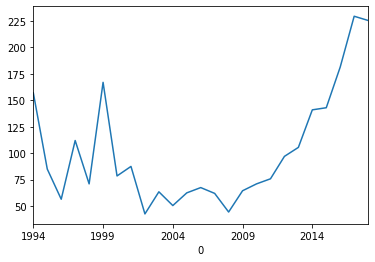

In [729]:
%pylab inline
df2[3].plot(kind = 'line')

## 回家作業

我們嘗試使用課堂上所教學到的方法開始清理以下資料集

資料集連結：

https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/cs-training.csv.zip

- 問題一 請使用Pandas 的 read_csv 方法載入資料集 (提示：read_csv)
- 問題二 請列出各欄位分別是什麼資料型態 (提示：info)?
- 問題三 請列出所有資料的敘述性統計(提示：describe)?
- 問題四 請列出該資料有哪些欄位(提示：columns)?
- 問題五 請捨棄NumberOfTime30_59DaysPastDueNotW', 'NumberOfTime60_89DaysPastDueNotW','NumberOfTimes90DaysLate'等三個欄位(提示：drop)
- 問題六 請找出有哪幾個欄位有包含遺失值(提示：isnull)
- 問題七 請計算出MonthlyIncome欄位的遺失比例(提示：isnull)
- 問題八 請捨棄 MonthlyIncome 為 NaN的值(提示：dropna)
- 問題九 請捨棄 NumberOfDependents 為 NaN的值(提示：dropna)
- 問題十 請將 NumberOfDependents > 5 的值設定為 5 ; 請將 NumberRealEstateLoansOrLines > 5 的值設定為 5; 請將 MonthlyIncome > 25000 的值設定為 25000; 請將 NumberOfOpenCreditLinesAndLoans > 30 的值設定為 30; 請將 Age > 80 的值設定為 80; 請將 Age < 18 的值設定為 18; (提示：loc 或 map)